<a href="https://colab.research.google.com/github/Nomade25/Portifolio-e-Projetos-de-Estudos/blob/main/NPS_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalação do "scikitplot"
!pip install -q scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings ("ignore")

 
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'
 
 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Padronização
from sklearn.preprocessing import StandardScaler
# Balanceamento
from imblearn.under_sampling import RandomUnderSampler
# Validação Cruzada
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [ ]:
# Carregando dataset
dataset_NPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Arquivos/DataSet_NPS.xlsx") 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lendos os dados
dataset_NPS.head()

,CodAgente,LoginRAE,Nome,HorasTreinamento,ClassificacaoTreinamento,TempoAtendimento,TempoAtendimentoSeg,ClassificacaoTempoAtend,Telefone,Servico,Equipe,Espera,EsperaSeg,ClassificacaoEspera,Mes,Canal,P1_Detalhado,Intervalo,Hora,DataAtendimento,CPF,CNPJ,PorteEmpresa,idProdutoServico,ProdutoConsumido,SexoCliente,DataNascimentoCliente,EscolaridadeCliente,DataAberturaEmpresa
0,605494,T_APARECIDACS,APARECIDA CARDOSO DA SILVA,39,Alto,00:06:00,360,Regular Interação,1.127591e+09,Rec - N1 - Atendimento Geral,CINTIA MARIA,00:01:04,64.0,Espera Alta,4,Central Receptivo N1,Promotor,12:00:00,12:53:00,2021-04-26,6833535,0,PF,148,INFORMAÇÃO SOBRE PRODUTOS DO SEBRAE-SP,M,13/11/1980,Ensino Médio Completo,13/02/2013
1,605478,T_CAMILARP,CAMILA RODRIGUES DE PINHO,39,Alto,00:13:00,781,Alta Interação,1.938213e+09,Rec - N1 - Atendimento Geral,CINTIA MARIA,00:00:32,32.0,Espera Moderado,3,Central Receptivo N1,Promotor,12:00:00,12:10:00,2021-03-09,12816825,9324639000105,MEI,148,INFORMAÇÃO SOBRE PRODUTOS DO SEBRAE-SP,F,19/03/1963,Ensino Médio Completo,13/11/2007
2,605478,T_CAMILARP,CAMILA RODRIGUES DE PINHO,39,Alto,00:13:00,781,Alta Interação,1.938213e+09,Rec - N1 - Atendimento Geral,CINTIA MARIA,00:00:32,32.0,Espera Moderado,3,Central Receptivo N1,Promotor,12:00:00,12:10:00,2021-03-09,12816825,9324639000105,MEI,2458,Informação Programa Empreenda Rápido,F,19/03/1963,Ensino Médio Completo,13/11/2007
3,605453,T_TATIANAPS,TATIANA PINHEIRO SANTOS,15,Regular,00:07:00,421,Regular Interação,1.398866e+10,Rec - N1 - Atendimento Geral,MAYARA SOUZA,00:00:00,0.0,Baixa Espera,7,Central Receptivo N1,Promotor,04:00:00,04:03:00,2021-07-14,27950603,0,PF,1614,PASSO A PASSO PARA FORMALIZAÇÃO DO MEI,M,05/05/1971,Ensino Médio Completo,24/05/2010
4,605494,T_APARECIDACS,APARECIDA CARDOSO DA SILVA,39,Alto,00:08:00,480,Regular Interação,1.131992e+09,Rec - N1 - Atendimento Geral,CINTIA MARIA,00:00:00,0.0,Baixa Espera,3,Central Receptivo N1,Promotor,09:00:00,09:33:00,2021-03-18,32922744,17734332000100,ME,1573,FAMPE-FUNDO DE AVAL ÀS MICRO E PEQUENAS EMPRESAS,M,24/01/1968,Educação Superior Completo,06/02/2013


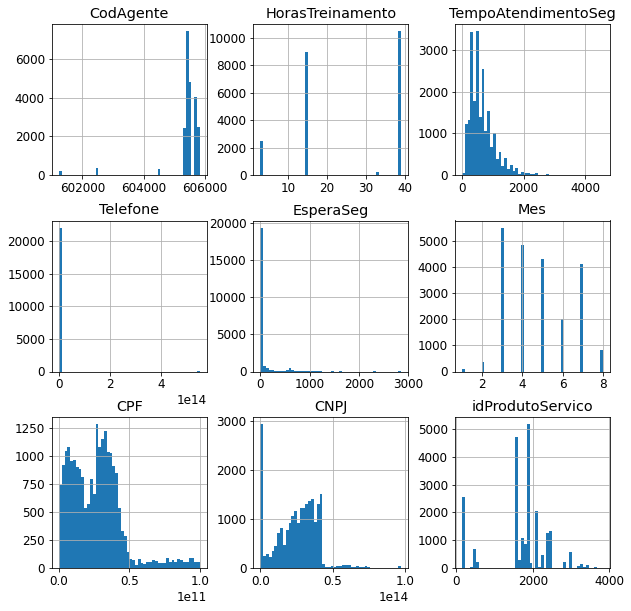

In [ ]:
# Plotando os dados para melhor visualizaçao
dataset_NPS.hist(bins=50, figsize=(10,10))
plt.show()

# conforme podemos observar algumas features estão desbalanceadas.

In [ ]:
# quais as colunas com valores vazios ou nulos?

(dataset_NPS.isnull().sum()).sort_values(ascending=False)

Telefone                    51
DataAberturaEmpresa          0
ClassificacaoEspera          0
LoginRAE                     0
Nome                         0
HorasTreinamento             0
ClassificacaoTreinamento     0
TempoAtendimento             0
TempoAtendimentoSeg          0
ClassificacaoTempoAtend      0
Servico                      0
Equipe                       0
Espera                       0
EsperaSeg                    0
Mes                          0
EscolaridadeCliente          0
Canal                        0
P1_Detalhado                 0
Intervalo                    0
Hora                         0
DataAtendimento              0
CPF                          0
CNPJ                         0
PorteEmpresa                 0
idProdutoServico             0
ProdutoConsumido             0
SexoCliente                  0
DataNascimentoCliente        0
CodAgente                    0
dtype: int64

In [ ]:
# Verificando tipos de atributo
# Temos varios dados do tipo float que podemos normatizar

In [ ]:
dataset_NPS.dtypes

CodAgente                            int64
LoginRAE                            object
Nome                                object
HorasTreinamento                     int64
ClassificacaoTreinamento            object
TempoAtendimento                    object
TempoAtendimentoSeg                  int64
ClassificacaoTempoAtend             object
Telefone                           float64
Servico                             object
Equipe                              object
Espera                              object
EsperaSeg                          float64
ClassificacaoEspera                 object
Mes                                  int64
Canal                               object
P1_Detalhado                        object
Intervalo                           object
Hora                                object
DataAtendimento             datetime64[ns]
CPF                                  int64
CNPJ                                 int64
PorteEmpresa                        object
idProdutoSe

Fase de pré processamento
Fazendo mapping das variaveis categoricas para númerico !
Random forest trabalha melhor com atributos numericos



In [ ]:
# transformar Varivável Objetiva para númerico
# detrator = 0
# Neutro = 1
# Promotor = 2

In [ ]:
 PerfilCliente = dataset_NPS.P1_Detalhado

In [ ]:
PerfilCliente = {"Detrator":0,"Neutro":2, "Promotor":1}
dataset_NPS['P1_Detalhado']= dataset_NPS['P1_Detalhado'].map(PerfilCliente)

In [ ]:
# transformar classificação treinamento em numerico
# abaixo = 0
# regular = 1
# medio = 2
# Alto = 3

In [ ]:
treinamentoEquipe = {"Abaixo":0,"Regular":1, "Médio":2, "Alto":3}
dataset_NPS['ClassificacaoTreinamento']= dataset_NPS['ClassificacaoTreinamento'].map(treinamentoEquipe)

In [ ]:
# transformar tempo de atendimento
# Pouca interação =0
# Regular Interação = 1
# Média interação =2
# Alta interação = 3

In [ ]:
TempoAtendimento = {"Pouca interação":0,"Regular Interação":1, "Média Interação":2, "Alta Interação":3}
dataset_NPS['ClassificacaoTempoAtend']= dataset_NPS['ClassificacaoTempoAtend'].map(TempoAtendimento)

In [ ]:
# transformar tempo de espera
# Baixa Espera =0
# Espera Moderado = 1
# Espera Alta =2
# Espera muito Alta = 3

In [ ]:
TempoEspera = {"Baixa Espera":0,"Espera Moderado":1, "Espera Alta":2, "Espera muito Alta":3}
dataset_NPS['ClassificacaoEspera']= dataset_NPS['ClassificacaoEspera'].map(TempoEspera)

In [ ]:
# Transformar Sexo cliente
# M = 0
# F = 1
SexoCli = {"M":0,"F":1,}
dataset_NPS['SexoCliente']= dataset_NPS['SexoCliente'].map(SexoCli)


In [ ]:
# Transformar porte empresa
# PF = 0
# MEI = 1
# ME = 2
# EPP = 3
# MÉDIA = 4
# GRANDE = 5

In [ ]:
Porte = {"PF":0,"MEI":1, "ME":2, "EPP":3,"MÉDIA":4,"GRANDE":5}
dataset_NPS['PorteEmpresa']= dataset_NPS['PorteEmpresa'].map(Porte)

In [ ]:
# Podemos realizar agrupamentos na graduação do cliente

dataset_NPS['EscolaridadeCliente'] = dataset_NPS['EscolaridadeCliente'].replace(['Ensino Médio Completo','Ensino Médio Incompleto'],0)
dataset_NPS['EscolaridadeCliente'] = dataset_NPS['EscolaridadeCliente'].replace(['Ensino Fundamental Completo','Do 6º ao 9º Ano do Ensino Fundamental ','Do 6º ao 9º Ano do Ensino Fundamental ','Até o 5º ano Incompleto do Ensino Fundamental','5º Ano Completo do Ensino Fundamental'],1)
dataset_NPS['EscolaridadeCliente'] = dataset_NPS['EscolaridadeCliente'].replace(['Educação Superior Completo','Educação Superior Incompleto'],2)
dataset_NPS['EscolaridadeCliente'] = dataset_NPS['EscolaridadeCliente'].replace(['Pós Graduação Completo','Pós Graduação Incompleto'],3)
dataset_NPS['EscolaridadeCliente'] = dataset_NPS['EscolaridadeCliente'].replace(['Doutorado Completo','Pós Doutorado Completo','Doutorado Incompleto','Pós Doutorado Incompleto'],4)
dataset_NPS['EscolaridadeCliente'] = dataset_NPS['EscolaridadeCliente'].replace(['Mestrado Incompleto','Mestrado Completo'],5)
dataset_NPS['EscolaridadeCliente'] = dataset_NPS['EscolaridadeCliente'].replace(['Analfabeto'],6)
dataset_NPS['EscolaridadeCliente'] = dataset_NPS['EscolaridadeCliente'].replace(['Não Informado pelo Cliente'],7)

In [ ]:
# Transformando serviço
#Rec - N1 - Atendimento Geral = 0
#Rec - N1 - MEI = 1
#Rec - N1 - Duvidas do emissor e NFE = 2
#Rec - N1 - Abertura e Alteracao de Empresa = 3
#Rec - N2 - Baixa MPE = 4
#Rec - N2 - Nota Fiscal e Emissor = 5
#Rec - N2 - Emissor = 6
#Rec - N2 - Financas = 7
#Rec - N2 - Cultura Empreendedora = 8
#Rec - N2 - Leis = 9
#Rec - N1 - Alteracao Cadastral = 10
#Rec - N2 - Marketing = 11
#Rec - N1 - Duvida Financeira = 12
#Rec - N1 - Linhas de Credito = 13
#Rec - N2 - MKT = 14
#Rec - N2 - Enquadramento e  Porte = 15
#Rec - N2 - Abertura = 16
#Rec - N2 - Planejamento = 17

ServicoNovo = {"Rec - N1 - Atendimento Geral":0,"Rec - N1 - MEI":1, "Rec - N1 - Duvidas do emissor e NFE":2, "Rec - N1 - Abertura e Alteracao de Empresa":3,"Rec - N2 - Baixa MPE":4,"Rec - N2 - Nota Fiscal e Emissor":5,
               "Rec - N2 - Emissor":6,"Rec - N2 - Financas":7,"Rec - N2 - Cultura Empreendedora":8,
               "Rec - N2 - Leis":9,"Rec - N1 - Alteracao Cadastral":10,"Rec - N2 - Marketing":10,
               "Rec - N1 - Duvida Financeira":11,"Rec - N1 - Linhas de Credito":13,
               "Rec - N2 - MKT":13,"Rec - N2 - MKT":14,"Rec - N2 - Enquadramento e  Porte":15,
               "Rec - N2 - Abertur":16,"Rec - N2 - Planejamento":17}
dataset_NPS['Servico']= dataset_NPS['Servico'].map(ServicoNovo)



In [ ]:
dataset_NPS.head()

,CodAgente,LoginRAE,Nome,HorasTreinamento,ClassificacaoTreinamento,TempoAtendimento,TempoAtendimentoSeg,ClassificacaoTempoAtend,Telefone,Servico,Equipe,Espera,EsperaSeg,ClassificacaoEspera,Mes,Canal,P1_Detalhado,Intervalo,Hora,DataAtendimento,CPF,CNPJ,PorteEmpresa,idProdutoServico,ProdutoConsumido,SexoCliente,DataNascimentoCliente,EscolaridadeCliente,DataAberturaEmpresa
0,605494,T_APARECIDACS,APARECIDA CARDOSO DA SILVA,39,3,00:06:00,360,1,1.127591e+09,0.0,CINTIA MARIA,00:01:04,64.0,2,4,Central Receptivo N1,1,12:00:00,12:53:00,2021-04-26,6833535,0,0,148,INFORMAÇÃO SOBRE PRODUTOS DO SEBRAE-SP,0,13/11/1980,0,13/02/2013
1,605478,T_CAMILARP,CAMILA RODRIGUES DE PINHO,39,3,00:13:00,781,3,1.938213e+09,0.0,CINTIA MARIA,00:00:32,32.0,1,3,Central Receptivo N1,1,12:00:00,12:10:00,2021-03-09,12816825,9324639000105,1,148,INFORMAÇÃO SOBRE PRODUTOS DO SEBRAE-SP,1,19/03/1963,0,13/11/2007
2,605478,T_CAMILARP,CAMILA RODRIGUES DE PINHO,39,3,00:13:00,781,3,1.938213e+09,0.0,CINTIA MARIA,00:00:32,32.0,1,3,Central Receptivo N1,1,12:00:00,12:10:00,2021-03-09,12816825,9324639000105,1,2458,Informação Programa Empreenda Rápido,1,19/03/1963,0,13/11/2007
3,605453,T_TATIANAPS,TATIANA PINHEIRO SANTOS,15,1,00:07:00,421,1,1.398866e+10,0.0,MAYARA SOUZA,00:00:00,0.0,0,7,Central Receptivo N1,1,04:00:00,04:03:00,2021-07-14,27950603,0,0,1614,PASSO A PASSO PARA FORMALIZAÇÃO DO MEI,0,05/05/1971,0,24/05/2010
4,605494,T_APARECIDACS,APARECIDA CARDOSO DA SILVA,39,3,00:08:00,480,1,1.131992e+09,0.0,CINTIA MARIA,00:00:00,0.0,0,3,Central Receptivo N1,1,09:00:00,09:33:00,2021-03-18,32922744,17734332000100,2,1573,FAMPE-FUNDO DE AVAL ÀS MICRO E PEQUENAS EMPRESAS,0,24/01/1968,2,06/02/2013


In [ ]:
# verificando as novas features
dataset_NPS.dtypes

CodAgente                            int64
LoginRAE                            object
Nome                                object
HorasTreinamento                     int64
ClassificacaoTreinamento             int64
TempoAtendimento                    object
TempoAtendimentoSeg                  int64
ClassificacaoTempoAtend              int64
Telefone                           float64
Servico                            float64
Equipe                              object
Espera                              object
EsperaSeg                          float64
ClassificacaoEspera                  int64
Mes                                  int64
Canal                               object
P1_Detalhado                         int64
Intervalo                           object
Hora                                object
DataAtendimento             datetime64[ns]
CPF                                  int64
CNPJ                                 int64
PorteEmpresa                         int64
idProdutoSe

In [ ]:
# Criando novo dataset com as features de interesse

In [ ]:
dataset_NPS_New = dataset_NPS.drop(['CodAgente','LoginRAE','Nome',
'Telefone','Equipe','Espera','EsperaSeg','Mes','Canal',
'DataAtendimento','ProdutoConsumido','DataNascimentoCliente','DataAberturaEmpresa','Intervalo','Hora','CNPJ','CPF','TempoAtendimento'], axis =1)

In [ ]:
dataset_NPS_New.dtypes

HorasTreinamento              int64
ClassificacaoTreinamento      int64
TempoAtendimentoSeg           int64
ClassificacaoTempoAtend       int64
Servico                     float64
ClassificacaoEspera           int64
P1_Detalhado                  int64
PorteEmpresa                  int64
idProdutoServico              int64
SexoCliente                   int64
EscolaridadeCliente           int64
dtype: object

In [ ]:
# tratamento valores vazios
dataset_NPS_New['Servico'] = dataset_NPS_New['Servico'].fillna(0)

In [ ]:
# tratamento feature
dataset_NPS_New['Servico'] = dataset_NPS_New['Servico'].astype('int64')

In [ ]:
# Verificação dos valores nulos estão ok
(dataset_NPS_New.isnull().sum()).sort_values(ascending=False)

EscolaridadeCliente         0
SexoCliente                 0
idProdutoServico            0
PorteEmpresa                0
P1_Detalhado                0
ClassificacaoEspera         0
Servico                     0
ClassificacaoTempoAtend     0
TempoAtendimentoSeg         0
ClassificacaoTreinamento    0
HorasTreinamento            0
dtype: int64

In [ ]:
# Renomeando features
dataset_NPS_New=  dataset_NPS_New.rename(columns={'P1_Detalhado':'PerfilCliente'})

In [ ]:
# Dropando a variavel classificação cliente Neutro
dataset_NPS_New.drop(dataset_NPS_New.loc[dataset_NPS_New['PerfilCliente']==2].index, inplace= True)

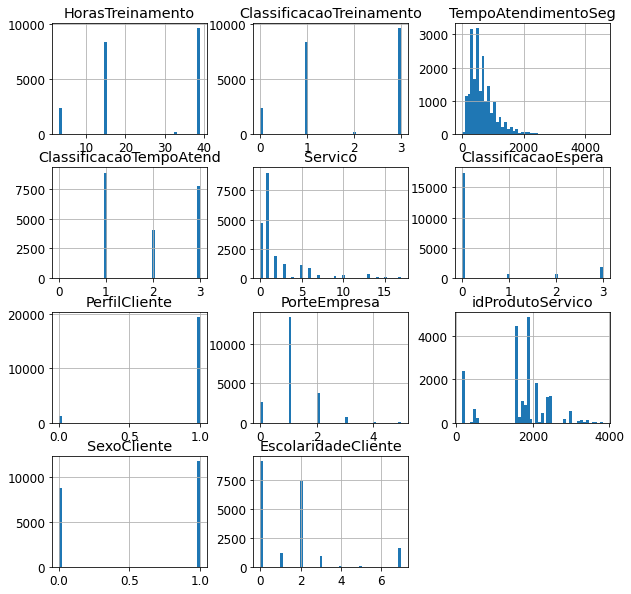

In [ ]:
# Plotando o novo dataframe
dataset_NPS_New.hist(bins=50, figsize=(10,10))
plt.show()

Vamos rodar o modelo de classificação daqui !!


In [ ]:
# Medindo as correlações
corr = dataset_NPS_New.corr () [["PerfilCliente"]].abs().sort_values(by="PerfilCliente", ascending =False)
corr  


,PerfilCliente
PerfilCliente,1.000000
PorteEmpresa,0.063703
HorasTreinamento,0.052150
ClassificacaoTreinamento,0.052111
ClassificacaoEspera,0.041424
idProdutoServico,0.016945
EscolaridadeCliente,0.016259
ClassificacaoTempoAtend,0.010614
SexoCliente,0.005410
Servico,0.002829


In [ ]:
maior_corr = corr.index[abs(corr["PerfilCliente"])>0]
maior_corr 

Index(['PerfilCliente', 'PorteEmpresa', 'HorasTreinamento',
       'ClassificacaoTreinamento', 'ClassificacaoEspera', 'idProdutoServico',
       'EscolaridadeCliente', 'ClassificacaoTempoAtend', 'SexoCliente',
       'Servico', 'TempoAtendimentoSeg'],
      dtype='object')

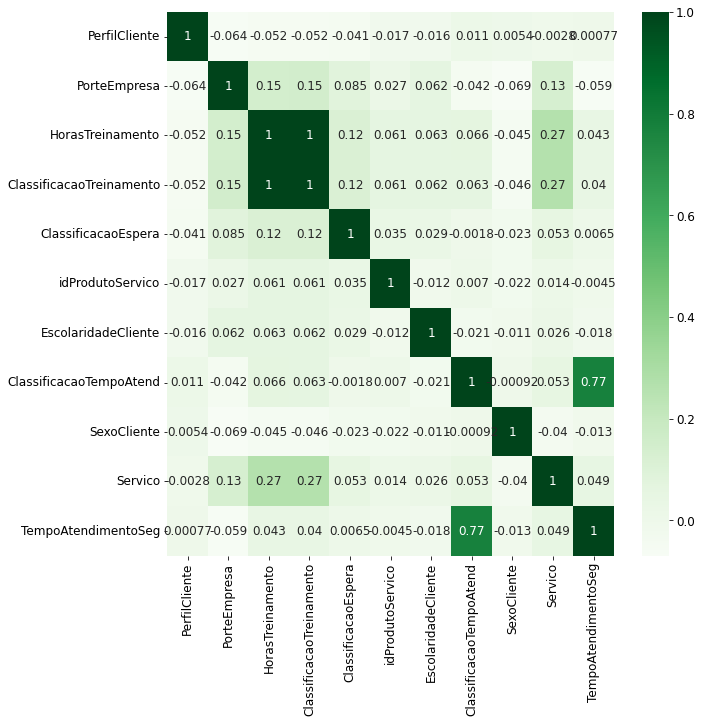

In [ ]:
# Abaixo podemos plotar esses dados num mapa de calor pra entender qual variável faz mais sentido com perfil cliente
plt.figure(figsize=(10,10))
ax = sns.heatmap(dataset_NPS_New[maior_corr].corr(),annot=True, cmap="Greens")

In [ ]:
# criando as bases de teste e treino (com todas features tratadas) e a variavel objetiva "P1_Detalhada"

predictors = dataset_NPS_New.drop(["PerfilCliente"], axis =1)
target = dataset_NPS_New ["PerfilCliente"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size =0.1, random_state =123 )

In [ ]:
# Exibir alocações
print('grupo de treino',x_train.shape)
print('grupo de teste',x_test.shape)

grupo de treino (18539, 10)
grupo de teste (2060, 10)


In [ ]:
# Rodando o random forest com 500 arvores para o modelo perfil de cliente

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randonforest = RandomForestClassifier(n_estimators =500)
randonforest.fit(x_train, y_train)
y_pred = randonforest.predict(x_test)
acc_randonforest = round(accuracy_score(y_pred, y_test)*100,2)
print(acc_randonforest)



95.19


In [ ]:
# matriz de confusão gerada com pandas

from sklearn.metrics import confusion_matrix

print(pd.crosstab(y_test,randonforest.predict(x_test), rownames=['Real'],colnames=['Predito'], margins= True))

Predito   0     1   All
Real                   
0        41    77   118
1        22  1920  1942
All      63  1997  2060


In [ ]:
# Conforme podemos observar, o modelo está desbalanceado, fazendo com que,
# a primeira instancia tenha percentual de acerto menor
# vamos realizar um balanceamento do dataframe para otimizar os resultados

In [ ]:
# Criando um objeto para o balanceamento "RandomUnderSampler()":
rus = RandomUnderSampler()

In [ ]:
# Atribuindo a base de dados treinada e aplicando 
#a técnica "Under-Sampling" (preservação da classe minoritária):
x_rus, y_rus = rus.fit_sample(x_train, y_train)

In [ ]:
# Dados sem balanceamento
print(pd.Series(y_train).value_counts())

1    17447
0     1092
Name: PerfilCliente, dtype: int64


In [ ]:
# confirmação do balanceamento

# Verificando o balanceamento das classes após o tratamento:
print(pd.Series(y_rus).value_counts())

1    1092
0    1092
dtype: int64


In [ ]:
# verificando teste
print(pd.Series(y_pred).value_counts())

1    1997
0      63
dtype: int64


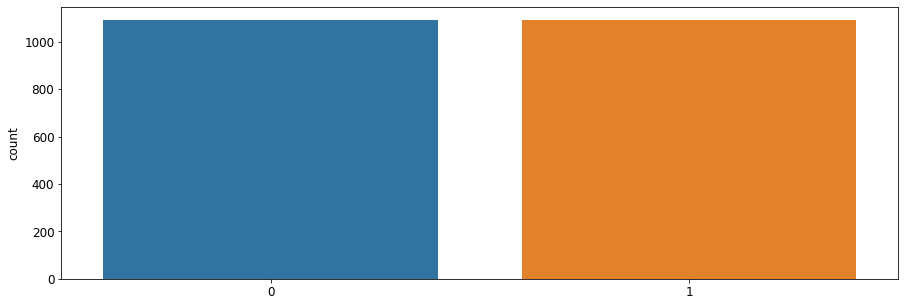

In [ ]:
# Graficamente
# Detrator = 0
# Promotor = 1
# Visualizando a nova distribuição entre as classes:
sns.countplot(y_rus);

In [ ]:
# Para termos uma correta verificação do que foi realizado vamos comparar numa matriz de correlação o antes e depois do tratamento acima: balanceamento.

# Criando duas matrizes de correlação: uma apenas com o "X_train", desbalanceado; outra já com o "X_rus", balanceado:
corr = x_train.corr()
corr_rus = pd.DataFrame(x_rus).corr()


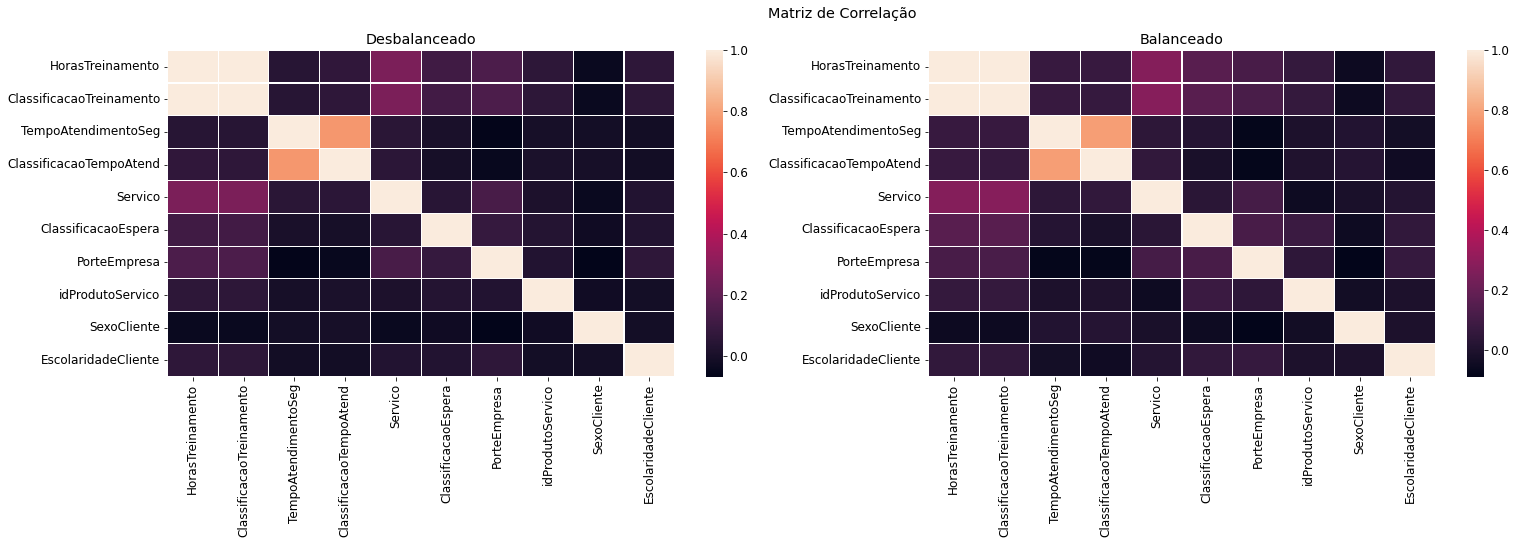

In [ ]:
# Plotando ambas matrizes de correlação:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (25,6))
fig.suptitle('Matriz de Correlação')

# x_train "desbalanceado"
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1,  ax=ax[0])
ax[0].set_title('Desbalanceado')

# x_rus "balanceado"
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1,  ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Vamos rodar novamente da random forest com o balanceamento !

In [ ]:

predictors = dataset_NPS_New.drop(["PerfilCliente"], axis =1)
target = dataset_NPS_New ["PerfilCliente"]
x_rus, x_test, y_rus, y_test = train_test_split(predictors, target, test_size =0.2, random_state =0 )

In [ ]:
# random forest a partir do tratamento
randonforest = RandomForestClassifier(n_estimators = 10000, min_samples_leaf=1,random_state=0,n_jobs=-1)
scaler = StandardScaler().fit(x_test)
randonforest.fit(x_rus, y_rus)
y_pred = randonforest.predict(x_test)
acc_randonforest = round(accuracy_score(y_pred, y_test)*100,2)
print(acc_randonforest)

94.95


In [ ]:
# matriz de confusão gerada com pandas

from sklearn.metrics import confusion_matrix

print(pd.crosstab(y_test,randonforest.predict(x_test), rownames=['Real'],colnames=['Predito'], margins= True))

Predito   0     1   All
Real                   
0        57   176   233
1        32  3855  3887
All      89  4031  4120


In [ ]:
# Realizando validação cruzada random forest
modelo_rf = RandomForestClassifier()
score_rf = cross_val_score(modelo_rf, x_rus, y_rus, cv=10, scoring="accuracy")



In [ ]:
# Métrica de avaliação da validação cruzada para Random Forest: acurácia.
print("Scores: ", score_rf)
print("\nAcurácia - Random Forest: {:.4f} (+/- {:.2f})".format(score_rf.mean(), score_rf.std()))

Scores:  [0.94114078 0.94478155 0.94538835 0.94296117 0.94356796 0.94538835
 0.94781553 0.94417476 0.94842233 0.9435337 ]

Acurácia - Random Forest: 0.9447 (+/- 0.00)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       233
           1       0.94      0.99      0.97      3887

    accuracy                           0.94      4120
   macro avg       0.47      0.50      0.48      4120
weighted avg       0.89      0.94      0.91      4120

Acurácia: 0.9371



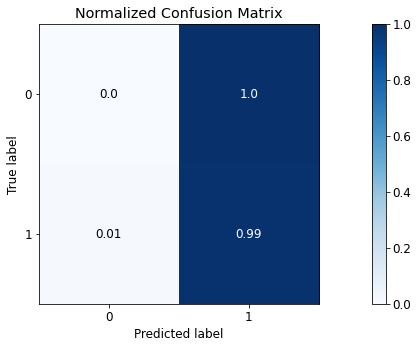

In [ ]:
# Avaliando o modelo de "Random Forest":
modelo_rf.fit(x_rus, y_rus)

# Padronizando o "X_test":
scaler = StandardScaler().fit(x_test)

# Realizando a previsão:
x_test = scaler.transform(x_test)
y_pred_rf = modelo_rf.predict(x_test)

# Imprimindo o "Classification Report":
print(classification_report(y_test, y_pred_rf))

# Imprimindo a "acurácia":
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_rf)))

# Plotando a matriz de confusão:
plot_confusion_matrix(y_test, y_pred_rf, normalize=True)
plt.tight_layout()